In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the saved model
# models_folder = "models"
# model_path = os.path.join(models_folder, "model_balanced_decision_tree.pkl")

# with open(model_path, "rb") as model_file:
    #balanced_decision_tree_model = pickle.load(model_file)

# print(f"Model loaded successfully from {model_path}")

model_path = "models/model_balanced_decision_tree.pkl"

# Open the file in binary read mode
with open(model_path, "rb") as file:
    balanced_decision_tree_model = pickle.load(file)

print("Model loaded successfully!")



Model loaded successfully!


In [3]:
# Load the new dataset
data_path = "hawaii_processed_data/hawaii_sentinel_2024_processed.feather"
hawaii_data = pd.read_feather(data_path)

In [4]:
print(hawaii_data.columns)

Index(['latitude', 'longitude', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8A', 'B11', 'B12', 'PI', 'NDWI', 'WRI', 'AWEI', 'MNDWI', 'SR',
       'RNDVI', 'ARI', 'MARI', 'CHL_RedEdge', 'REPI', 'EVI', 'EVI2', 'GNDVI',
       'MCARI', 'MSI', 'NDMI', 'NBR', 'NDSI', 'SAVI', 'OSI', 'PNDVI', 'NDVI',
       'FDI'],
      dtype='object')


In [5]:
#hawaii_data = hawaii_data.rename(columns={'B01_20m': 'B1'})
#hawaii_data = hawaii_data.rename(columns={'B08A_20m': 'B8A'})

In [5]:
# Ensure the dataset contains the required features
required_features = ['NDSI', 'MNDWI', 'NDWI', 'OSI', 'FDI', 'B1']
if not all(feature in hawaii_data.columns for feature in required_features):
    raise ValueError(f"The dataset is missing one or more required features: {required_features}")


In [6]:
new_features = hawaii_data[['NDSI', 'MNDWI', 'NDWI', 'OSI']]

In [7]:
new_features

,NDSI,MNDWI,NDWI,OSI
20517203,0.047656,0.072853,0.034928,1.721750
20517204,0.037204,0.047141,0.027550,1.764323
20517205,0.042561,0.058426,0.044923,1.679067
20522693,0.042945,0.052295,0.036190,1.703943
20522694,0.047547,0.061265,0.037369,1.742375
...,...,...,...,...
30140095,16.930660,17.027330,17.367877,1.825980
30140096,0.000000,0.001475,0.030138,1.815145
30140097,14.661214,14.503217,0.010663,1.868591
30140098,13.805063,13.339330,0.001079,1.895602


In [8]:
predictions = balanced_decision_tree_model.predict(new_features)

In [9]:
hawaii_data['labels_new'] = predictions

In [10]:
hawaii_data

,latitude,longitude,B1,B2,B3,B4,B5,B6,B7,B8A,...,MSI,NDMI,NBR,NDSI,SAVI,OSI,PNDVI,NDVI,FDI,labels_new
20517203,21.927519,-157.823860,273,1531,1363,1273,1223,1222,1267,1271,...,0.974823,0.012749,0.035438,0.047656,38.632737,1.721750,11.518941,25.760220,18.872511,water
20517204,21.927518,-157.823666,250,1536,1380,1330,1347,1325,1300,1306,...,0.980858,0.009664,0.018721,0.037204,37.272141,1.764323,11.274496,24.852807,58.977031,water
20517205,21.927516,-157.823472,228,1586,1384,1279,1328,1275,1293,1265,...,1.004743,25.839905,0.011191,0.042561,38.625663,1.679067,11.344215,25.755503,-2.911179,water
20522693,21.927339,-157.823861,1151,1547,1360,1276,1316,1275,1290,1265,...,0.986561,0.006765,0.014435,0.042945,38.673028,1.703943,11.493759,25.787092,37.849542,water
20522694,21.927337,-157.823667,1098,1541,1388,1297,1316,1293,1306,1288,...,0.979814,0.010196,0.021817,0.047547,38.016051,1.742375,11.352557,25.348936,49.938363,water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30140095,21.602810,-156.974240,1408,2040,1883,1842,1965,1894,1933,1890,...,1.048677,16.901860,16.819023,16.930660,0.019290,1.825980,8.054997,0.012862,-159.954062,water
30140096,21.602808,-156.974047,1527,2245,2085,1990,2020,1984,1964,1963,...,1.062150,16.159585,16.185057,0.000000,24.854812,1.815145,7.386092,16.571971,-199.992730,water
30140097,21.602806,-156.973854,1660,2321,2180,2157,2252,2155,2202,2134,...,1.069822,14.803487,14.567351,14.661214,22.898637,1.868591,6.939490,15.267537,-247.842272,sea snot
30140098,21.602803,-156.973661,1566,2433,2320,2292,2372,2315,2305,2315,...,1.045356,13.818585,13.275890,13.805063,0.007488,1.895602,6.496368,0.004992,-186.081551,sea snot


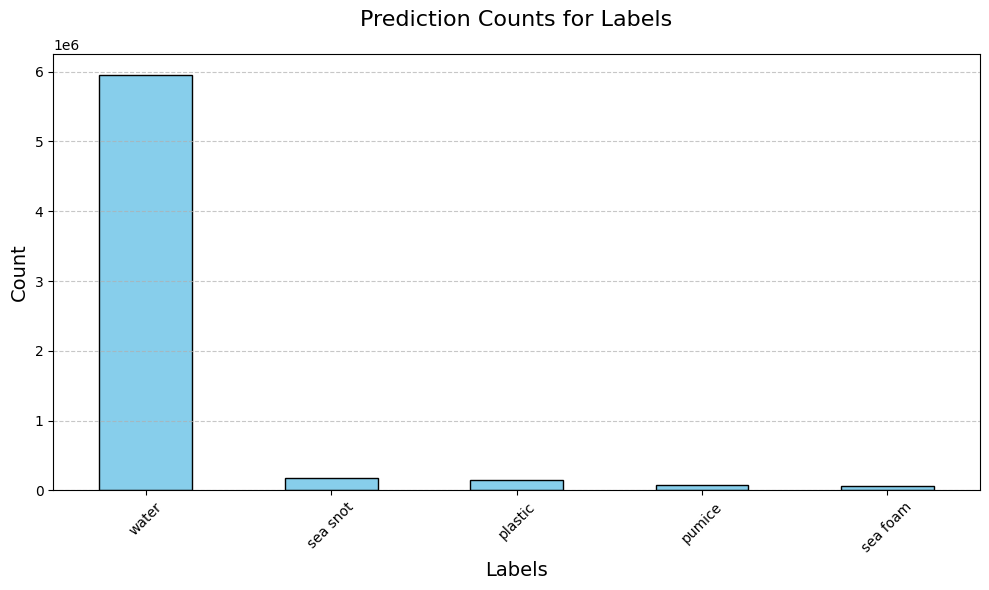

In [11]:
prediction_counts = hawaii_data['labels_new'].value_counts()
plt.figure(figsize=(10, 6))
prediction_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Prediction Counts for Labels', fontsize=16, pad=20)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
prediction_counts

labels_new
water       5958007
sea snot     179278
plastic      149518
pumice        82969
sea foam      61768
Name: count, dtype: int64